# Desafío Telecom X parte 2

El Desafío Telecom X parte 2 ofrece una oportunidad única para aplicar conocimientos fundamentales de estadística, regresión lineal y machine learning, además de habilidades esenciales en ciencia de datos, en un escenario empresarial real.

## Aplicación práctica del conocimiento

En este desafío, pondrás en práctica conceptos fundamentales de estadística, esenciales para comprender el comportamiento de los datos y fundamentar decisiones analíticas.

Uno de los pasos principales será preparar y separar los datos de forma adecuada para la creación de modelos predictivos, asegurando un equilibrio entre los datos de entrenamiento y prueba — algo indispensable para construir modelos confiables.

Al realizar el análisis de correlación entre variables, será posible identificar qué factores influyen más en la cancelación de servicios (churn). Esto permitirá aplicar la regresión lineal como herramienta para modelar estas relaciones y entender el impacto de cada variable en el comportamiento de los clientes.

Con ello, construirás una base sólida para el desarrollo de modelos de machine learning orientados a la predicción de churn, ayudando a la empresa a anticipar el riesgo de pérdida de clientes y tomar decisiones estratégicas para reducir ese impacto.

Este desafío no solo contribuye a tu crecimiento en el área de Ciencia de Datos, sino que también demuestra en la práctica cómo la ciencia de datos puede utilizarse para resolver problemas reales enfrentados por empresas en el mercado.

## Importaciones

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpsave
from PIL import Image
from IPython.display import display
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import os
from sklearn.svm import SVC

url = "/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/telecomX_2.csv"
os.makedirs("/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save", exist_ok=True)

# **Preparación de los Datos**

 ## Extracción del Archivo Tratado

In [115]:
data_original = pd.read_csv(url)
data_copy = data_original.copy()

print(f'filas y columnas {data_copy.shape}')
print(data_copy.head())

filas y columnas (7032, 22)
   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO  False  Female              0     True        True       9   
1  0003-MKNFE  False    Male              0    False       False       9   
2  0004-TLHLJ   True    Male              0    False       False       4   
3  0011-IGKFF   True    Male              1     True       False      13   
4  0013-EXCHZ   True  Female              1     True       False       3   

   PhoneService  MultipleLines InternetService  ...  DeviceProtection  \
0          True          False             DSL  ...             False   
1          True           True             DSL  ...             False   
2          True          False     Fiber optic  ...              True   
3          True          False     Fiber optic  ...              True   
4          True          False     Fiber optic  ...             False   

   TechSupport  StreamingTV  StreamingMovies        Contract  \
0         Tr

## Eliminación de Columnas Irrelevantes

In [116]:
data_copy.drop(columns=["customerID"], inplace=True)

print(data_copy.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges_Monthly', 'Charges_Total', 'Cuentas_Diarias'],
      dtype='object')


## Encoding

In [117]:
data_encoded = pd.get_dummies(data_copy, drop_first=True)

print(data_encoded.head())
print(data_encoded.shape)

   Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  False              0     True        True       9          True   
1  False              0    False       False       9          True   
2   True              0    False       False       4          True   
3   True              1     True       False      13          True   
4   True              1     True       False       3          True   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0          False           False          True             False  ...   
1           True           False         False             False  ...   
2          False           False         False              True  ...   
3          False           False          True              True  ...   
4          False           False         False             False  ...   

   Charges_Total  Cuentas_Diarias  gender_Male  InternetService_Fiber optic  \
0         593.30         2.186667        False               

## Verificación de la Proporción de Cancelación (Churn)

In [118]:
print(data_copy["Churn"].value_counts())
print(data_copy["Churn"].value_counts(normalize=True))

Churn
False    5163
True     1869
Name: count, dtype: int64
Churn
False    0.734215
True     0.265785
Name: proportion, dtype: float64


## Balanceo de Clases (opcional)

In [119]:
X = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"].astype(int)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Antes del balanceo:")
print(y.value_counts())

print("\nDespués del balanceo:")
print(y_res.value_counts())


Antes del balanceo:
Churn
0    5163
1    1869
Name: count, dtype: int64

Después del balanceo:
Churn
0    5163
1    5163
Name: count, dtype: int64


## Normalización o Estandarización (si es necesario)

In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

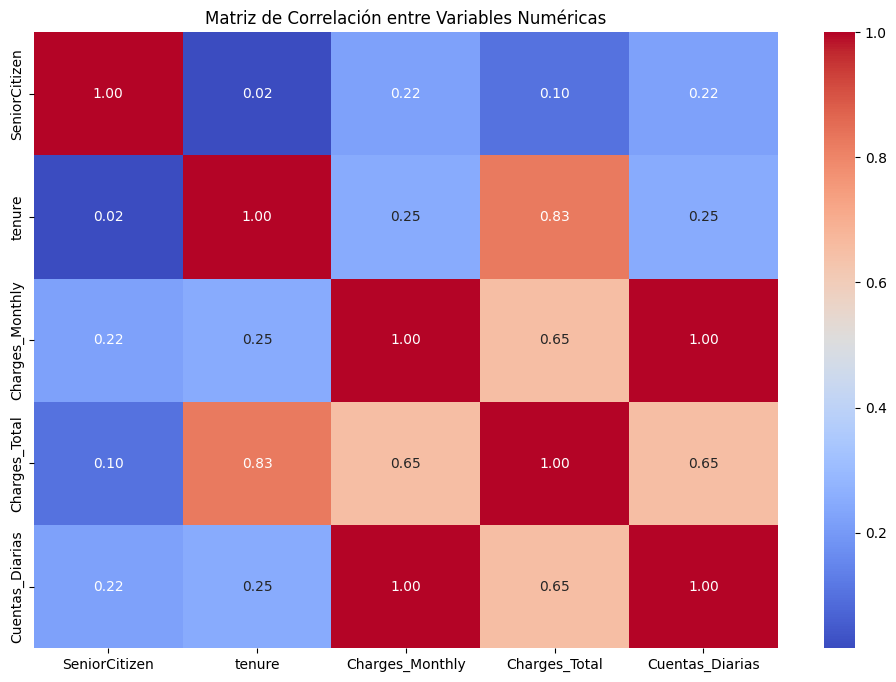

In [121]:
numericas = data_copy.select_dtypes(include=['int64', 'float64'])

corr = numericas.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


## Análisis Dirigido

/tmp/ipython-input-3157900593.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=data_copy, palette="Set2")


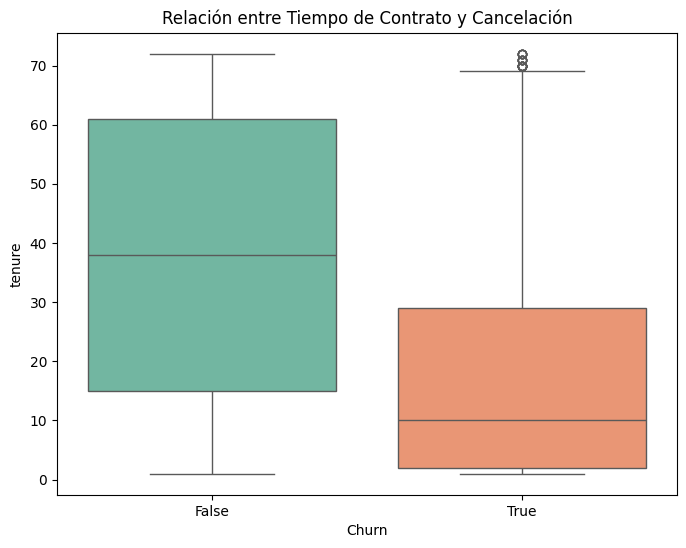

In [122]:
# Tiempo de contrato × Cancelación

plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="tenure", data=data_copy, palette="Set2")
plt.title("Relación entre Tiempo de Contrato y Cancelación")
plt.show()

/tmp/ipython-input-517087354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Charges_Total", data=data_copy, palette="Set1")


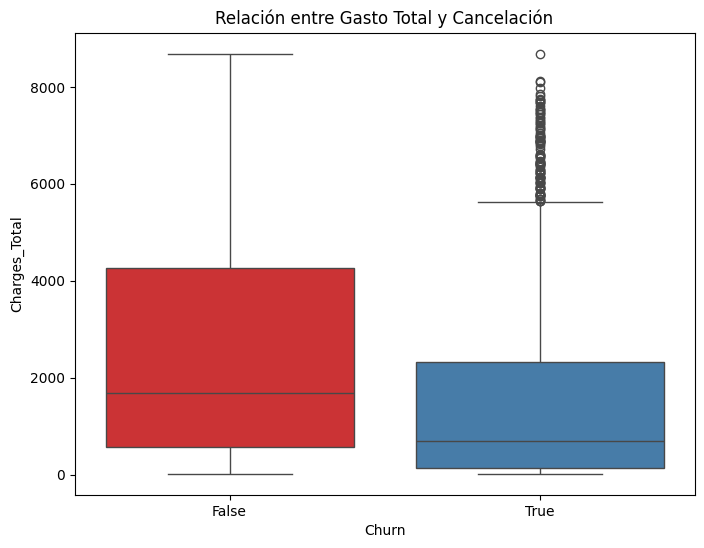

In [123]:
# Gasto total × Cancelación

plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="Charges_Total", data=data_copy, palette="Set1")
plt.title("Relación entre Gasto Total y Cancelación")
plt.show()


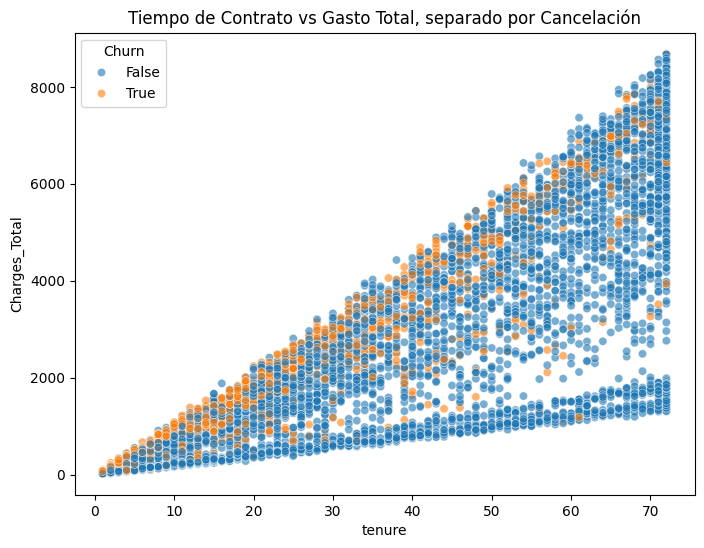

In [124]:
# Scatter Plot (para tendencias)

plt.figure(figsize=(8,6))
sns.scatterplot(x="tenure", y="Charges_Total", hue="Churn", data=data_copy, alpha=0.6)
plt.title("Tiempo de Contrato vs Gasto Total, separado por Cancelación")
plt.show()


# Modelado Predictivo

## Separación de Datos

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

Tamaño entrenamiento: (7228, 24)
Tamaño prueba: (3098, 24)


## Creación de Modelos

In [126]:
model_logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=42, max_iter=1000))
])

model_rf = RandomForestClassifier(random_state=42, n_estimators=200)

In [127]:
# Entrenamiento

model_logreg.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [128]:
# Evaluación

def evaluar_modelo(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)

    print(f"\n🔹 Resultados {nombre}:")
    print("Exactitud:", accuracy_score(y_test, y_pred))
    print("Precisión:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Evaluar ambos
evaluar_modelo(model_logreg, X_test, y_test, "Regresión Logística")
evaluar_modelo(model_rf, X_test, y_test, "Random Forest")



🔹 Resultados Regresión Logística:
Exactitud: 0.8318269851517108
Precisión: 0.8303341902313625
Recall: 0.8340865074241446
F1-score: 0.8322061191626409

Matriz de confusión:
 [[1285  264]
 [ 257 1292]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.83      0.83      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098


🔹 Resultados Random Forest:
Exactitud: 0.8489347966429954
Precisión: 0.8414403032217309
Recall: 0.8599096191091027
F1-score: 0.8505747126436781

Matriz de confusión:
 [[1298  251]
 [ 217 1332]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.84      0.86      0.85      1549

    accuracy                           0.85      3098
   

# Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

In [129]:

# Utilidades de graficación

def plot_top_bar(df, value_col, label_col, title, fname_png, top=25):
    top_df = df.sort_values(value_col, ascending=True).tail(top)
    plt.figure(figsize=(10, 8))
    sns.barplot(data=top_df, x=value_col, y=label_col)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname_png, dpi=150)
    plt.show()


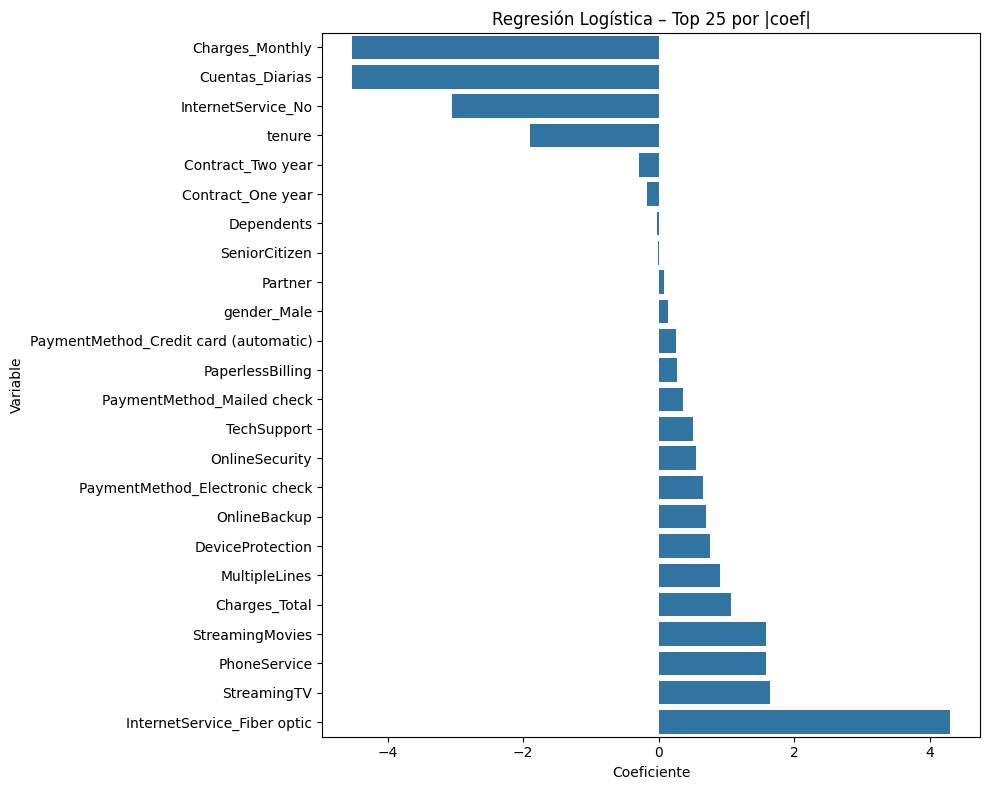

In [130]:
# 1) REGRESIÓN LOGÍSTICA


log_estimator = model_logreg.named_steps["logreg"]

feature_names = X_train.columns

coefs = log_estimator.coef_.ravel()
logreg_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs,
    "AbsCoef": np.abs(coefs)
}).sort_values("AbsCoef", ascending=False)


logreg_df.to_csv("/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/logreg_top25_coefs.csv", index=False)
plot_top_bar(
    df=logreg_df,
    value_col="Coeficiente",
    label_col="Variable",
    title="Regresión Logística – Top 25 por |coef|",
    fname_png="/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/logreg_top25_coefs.png",
    top=25
)

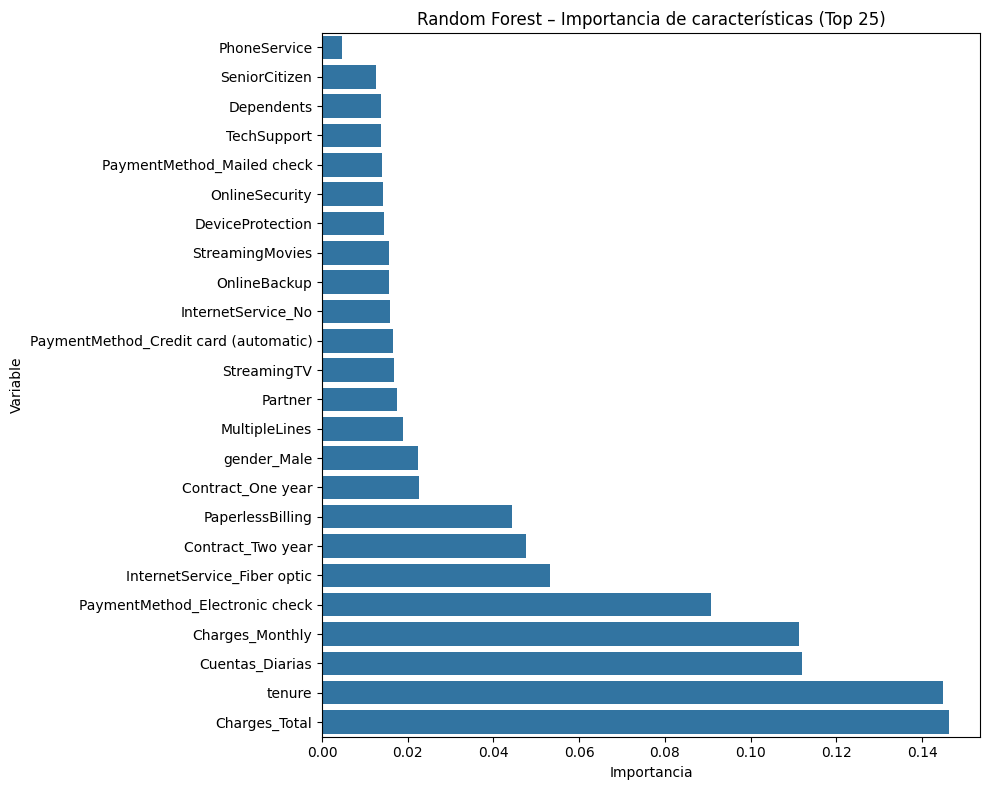

In [131]:
# 2) RANDOM FOREST

rf_importances = model_rf.feature_importances_
rf_df = pd.DataFrame({
    "Variable": feature_names,
    "Importancia": rf_importances
}).sort_values("Importancia", ascending=False)


rf_df.to_csv("/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/rf_top25_features.csv", index=False)
plot_top_bar(
    df=rf_df,
    value_col="Importancia",
    label_col="Variable",
    title="Random Forest – Importancia de características (Top 25)",
    fname_png="/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/rf_top25_features.png",
    top=25
)



KNN – Permutation Importance (Top 25):
                                 Variable  Importancia_media  Importancia_std
22         PaymentMethod_Electronic check           0.027717         0.003182
3                                  tenure           0.020788         0.003186
14                          Charges_Total           0.019583         0.001999
12                       PaperlessBilling           0.017603         0.002734
20                      Contract_Two year           0.015774         0.002774
19                      Contract_One year           0.015580         0.002869
17            InternetService_Fiber optic           0.012955         0.002494
23             PaymentMethod_Mailed check           0.012072         0.002027
13                        Charges_Monthly           0.009641         0.002784
15                        Cuentas_Diarias           0.009641         0.002784
18                     InternetService_No           0.009641         0.002095
16                      

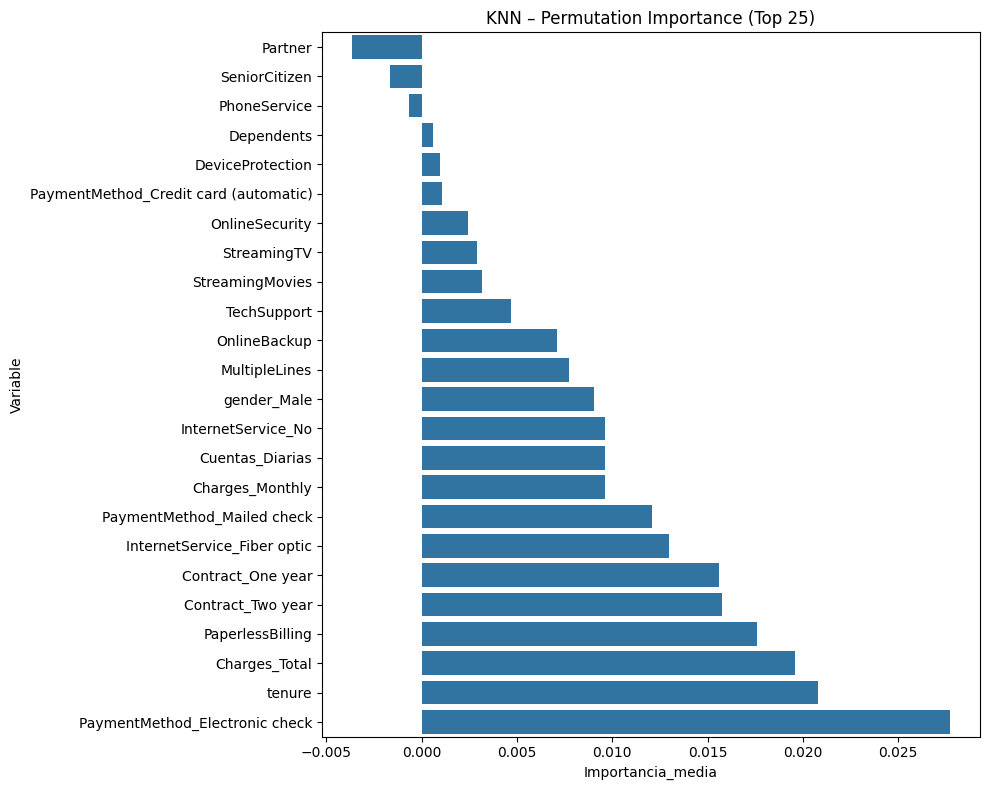

In [132]:
# 3) KNN + Permutation Importance

model_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=15))
])
model_knn.fit(X_train, y_train)

perm = permutation_importance(
    model_knn, X_test, y_test,
    n_repeats=15, random_state=42, n_jobs=-1
)

knn_df = pd.DataFrame({
    "Variable": feature_names,
    "Importancia_media": perm.importances_mean,
    "Importancia_std": perm.importances_std
}).sort_values("Importancia_media", ascending=False)


print("\nKNN – Permutation Importance (Top 25):")
print(knn_df.head(25))


knn_df.to_csv("/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/knn_perm_importance_top25.csv", index=False)
plot_top_bar(
    df=knn_df,
    value_col="Importancia_media",
    label_col="Variable",
    title="KNN – Permutation Importance (Top 25)",
    fname_png="/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/knn_perm_importance_top25.png",
    top=25
)

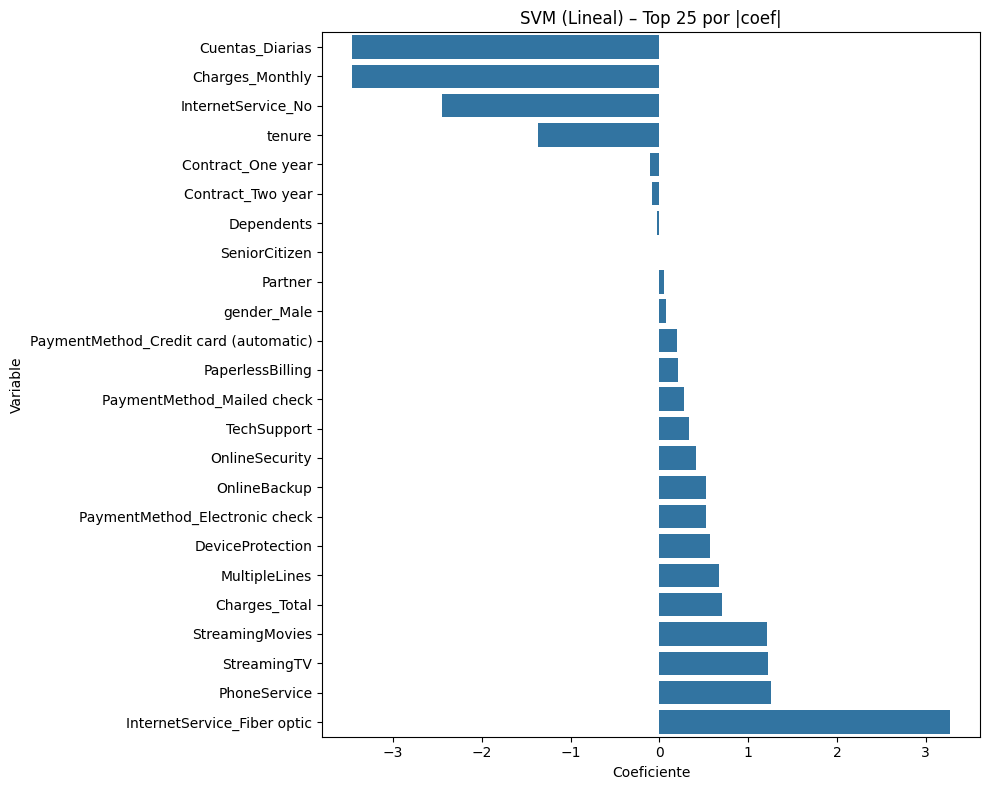

In [133]:
# 4) SVM LINEAL (OPCIONAL)

enable_svm = True

if enable_svm:
    model_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="linear", probability=False, random_state=42))
    ])
    model_svm.fit(X_train, y_train)


    svm_est = model_svm.named_steps["svm"]

    svm_coefs = svm_est.coef_.ravel()

    svm_df = pd.DataFrame({
        "Variable": feature_names,
        "Coeficiente": svm_coefs,
        "AbsCoef": np.abs(svm_coefs)
    }).sort_values("AbsCoef", ascending=False)

    svm_df.to_csv("/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/svm_top25_coefs.csv", index=False)
    plot_top_bar(
        df=svm_df,
        value_col="Coeficiente",
        label_col="Variable",
        title="SVM (Lineal) – Top 25 por |coef|",
        fname_png="/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/save/svm_top25_coefs.png",
        top=25
    )

### 1. Regresión Logística

  * Variables con mayor peso:

    * InternetService_Fiber optic (+) → aumenta fuertemente la probabilidad de churn.

    * Charges_Monthly (-) y Cuentas_Diarias (-) → parecen reducir el churn.

  * Modelo interpretable y útil para explicar tendencias, aunque puede simplificar relaciones no lineales.


### 2. KNN (K-Nearest Neighbors)

  * Variables más importantes:

    * Charges_Total, tenure, Cuentas_Diarias, Charges_Monthly.

    * Contratos a 1 y 2 años, además de PaperlessBilling también destacaron.

  * Modelo robusto y con buen rendimiento, capaz de capturar relaciones no lineales.

### 3. Random Forest

  * Variables clave según la permutación:

    * PaymentMethod_Electronic check, tenure, Charges_Total, PaperlessBilling, Contract_Two year.

  * Buen para datasets balanceados y relaciones locales, pero sensible a la escala de variables y vecinos cercanos.

### 4. SVM (opcional si lo incluyes)

  * Coeficientes similares a la Regresión Logística:

    * InternetService_Fiber optic (+) y Cuentas_Diarias (-) como variables críticas.

    * Reafirma la importancia de las variables de servicio y facturación en el churn.

  * Modelo útil cuando las clases son separables de manera lineal, aunque menos interpretable que Random Forest.

### Conclusión General

  * Todos los modelos coinciden en que:

    * tenure, tipo de contrato, método de pago, cargos mensuales/totales y tipo de servicio de internet son los principales determinantes del churn.

  * Random Forest y KNN capturan mejor relaciones no lineales, mientras que Logística y SVM ofrecen coeficientes más fáciles de interpretar.

  * Para interpretabilidad: Regresión Logística / SVM.

  * Para precisión y robustez: Random Forest.

  * Para relaciones locales y proximidad de clientes: KNN.

# Conclusión


## Conclusiones estratégicas

* **Perfil en mayor riesgo**:

  * **Tenure bajo** (clientes nuevos/recientes).
  * **Contrato mes a mes**.
  * **Pago con cheque electrónico**.
  * **Sin servicios de valor (Seguridad en línea / Soporte técnico)**.
  * **Internet Fiber optic** con cargos mensuales altos (a menudo sensible a precio/valor percibido).

* **Acciones de retención**:

  1. **Ofertas de permanencia**: actualizaciones a **contratos anuales** con descuentos los 3 primeros meses.
  2. **Paquetes de valor**: incluir **Seguridad en línea/Soporte técnico** gratis por 1–2 ciclos para clientes con mensulidad baja.
  3. **Alerta temprana**: monitorear a los **0–3 meses** con cargos altos y sin complementos → campaña proactiva.
  4. **Fricción de pago**: revisar clientes con **Cheque electrónico** (migrarlos a débito o tarjeta con incentivos).
  5. **Atención diferenciada**: priorizar soporte para **Fibra óptica** con quejas/uso intensivo.